In [30]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [31]:
import expectexception

In [73]:
df = pd.read_csv("../data/code_specialty_ip.csv")
provider = pd.read_csv("../data/train.csv")

In [76]:
df.shape

(40474, 74)

In [74]:
df = df.merge(provider, on="Provider")

In [77]:
df.shape

(40474, 74)

In [75]:
df.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,PotentialFraud
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66.0,1,2,2,0,1,0,2,0,0,0,0,0,0,0,1,0,0,Yes
1,1882,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,95.0,3,1,2,2,0,0,0,1,1,0,0,0,0,0,0,0,0,Yes
2,2964,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,3,0,0,0,4,0,0,0,0,0,0,1,0,0,2,0,0,Yes
3,3311,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,1930-07-01,NaN,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,2,0,2,0,1,1,0,0,0,0,0,0,0,0,2,0,0,Yes
4,3729,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,1748,1068.0,2009-01-12,593,2330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,1925-09-01,NaN,2,2,0,39,510,12,12,1,2,2,1,2,2,2,1,2,2,2,3000,1068,8900,740,83.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Yes


In [34]:
df.shape

(40474, 73)

In [35]:
diag = df[["ClaimID",
           "cardiology",
           "urology",
           "endocrinology",        
           "emergency",
           "general",
           "infectious",
           "oncology",
           "hematology",
           "psychiatry",
           "neurology",
           "pulmonology",
           "gastroenterology",
           "ob-gyn",
           "dermatology",
           "orthopedics",
           "congenital",
           "neonatology"
           ]]

In [36]:
diag.head()

,ClaimID,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology
0,CLM46614,1,2,2,0,1,0,2,0,0,0,0,0,0,0,1,0,0
1,CLM66048,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,CLM68358,0,0,0,0,1,0,1,0,2,2,0,0,0,0,1,0,0
3,CLM38412,4,0,2,0,2,1,0,0,0,1,0,0,0,0,0,0,0
4,CLM63689,1,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,0


In [37]:
diag = diag.fillna(0).set_index('ClaimID')

In [58]:
diag.replace(2, 1,inplace=True)
diag.replace(3, 1,inplace=True)
diag.replace(4, 1,inplace=True)
diag.replace(5, 1,inplace=True)
diag.replace(6, 1,inplace=True)
diag.replace(7, 1,inplace=True)
diag.replace(8, 1,inplace=True)
diag.replace(9, 1,inplace=True)

In [39]:
diag.head()

,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology
ClaimID,,,,,,,,,,,,,,,,,
CLM46614,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0
CLM66048,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
CLM68358,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0
CLM38412,4,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0
CLM63689,1,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0


In [40]:
diag.shape

(40474, 17)

### Most Frequent Items Visualization

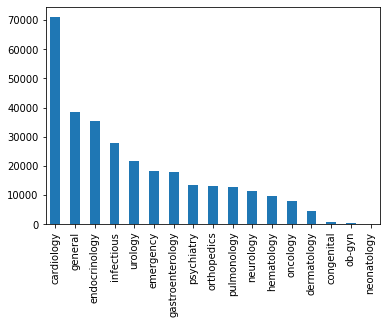

In [41]:
count = diag.sum(axis = 0).sort_values(ascending=False)
count.plot(kind="bar")

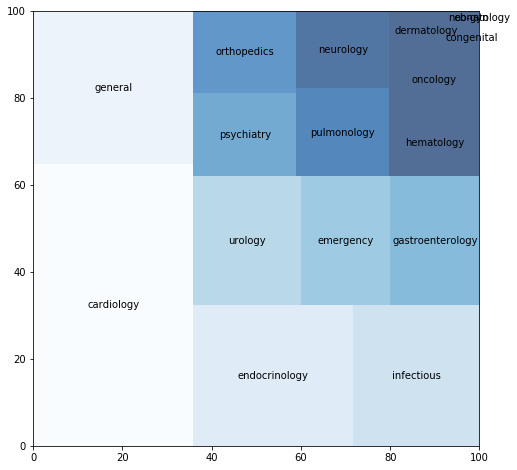

In [48]:
import squarify
plt.rcParams['figure.figsize']=(8,8)
Items = count.to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.Blues(np.linspace(0,2,22))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
#plt.title('Tree map of Most Frequent Items')
#plt.axis('off')
#plt.show()

In [64]:
frequent_itemsets = apriori(diag, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(urology),(cardiology),0.469289,0.853165,0.401146,0.854796,1.001912,0.000766,1.011234
1,(cardiology),(urology),0.853165,0.469289,0.401146,0.470186,1.001912,0.000766,1.001694
2,(endocrinology),(cardiology),0.687503,0.853165,0.591268,0.860023,1.008038,0.004715,1.048994
3,(cardiology),(endocrinology),0.853165,0.687503,0.591268,0.693029,1.008038,0.004715,1.018003
4,(general),(cardiology),0.686490,0.853165,0.594505,0.866007,1.015052,0.008816,1.095840


In [65]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(urology),(cardiology),0.469289,0.853165,0.401146,0.854796,1.001912,0.000766,1.011234
1,(cardiology),(urology),0.853165,0.469289,0.401146,0.470186,1.001912,0.000766,1.001694
2,(endocrinology),(cardiology),0.687503,0.853165,0.591268,0.860023,1.008038,0.004715,1.048994
3,(cardiology),(endocrinology),0.853165,0.687503,0.591268,0.693029,1.008038,0.004715,1.018003
4,(general),(cardiology),0.686490,0.853165,0.594505,0.866007,1.015052,0.008816,1.095840
5,(cardiology),(general),0.853165,0.686490,0.594505,0.696823,1.015052,0.008816,1.034083
6,(pulmonology),(cardiology),0.285986,0.853165,0.244280,0.854168,1.001176,0.000287,1.006881
7,(cardiology),(pulmonology),0.853165,0.285986,0.244280,0.286322,1.001176,0.000287,1.000471
8,(urology),(endocrinology),0.469289,0.687503,0.323467,0.689270,1.002570,0.000829,1.005687
9,(endocrinology),(urology),0.687503,0.469289,0.323467,0.470495,1.002570,0.000829,1.002278


In [72]:
rules.shape

(180, 9)

In [66]:
rules[(rules['lift'] >= 1)&(rules['confidence'] >= 0.8)].sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(general),(cardiology),0.686490,0.853165,0.594505,0.866007,1.015052,0.008816,1.095840
40,"(general, endocrinology)",(cardiology),0.470524,0.853165,0.407422,0.865890,1.014914,0.005987,1.094881
2,(endocrinology),(cardiology),0.687503,0.853165,0.591268,0.860023,1.008038,0.004715,1.048994
54,"(general, hematology)",(cardiology),0.153407,0.853165,0.131492,0.857143,1.004662,0.000610,1.027845
30,"(urology, general)",(cardiology),0.328211,0.853165,0.280723,0.855315,1.002520,0.000706,1.014858
44,"(general, infectious)",(cardiology),0.434205,0.853165,0.371350,0.855241,1.002433,0.000901,1.014339
0,(urology),(cardiology),0.469289,0.853165,0.401146,0.854796,1.001912,0.000766,1.011234
6,(pulmonology),(cardiology),0.285986,0.853165,0.244280,0.854168,1.001176,0.000287,1.006881
58,"(general, pulmonology)",(cardiology),0.186317,0.853165,0.159065,0.853733,1.000666,0.000106,1.003883


In [67]:
lift=rules['lift'].values
support=rules['support'].values
confidence=rules['confidence'].values
conviction=rules['conviction'].values

In [68]:
lift.max()

1.1310421371686001

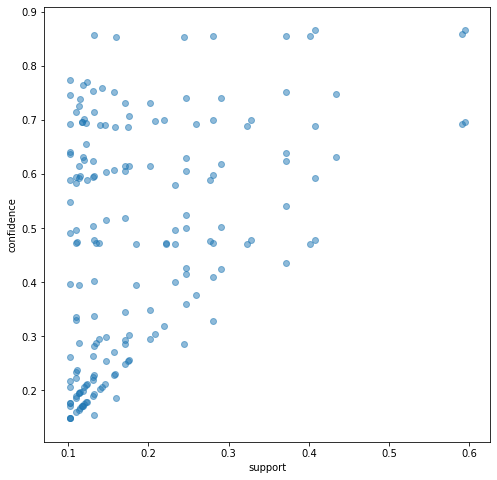

In [69]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.scatter(support, confidence,   alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

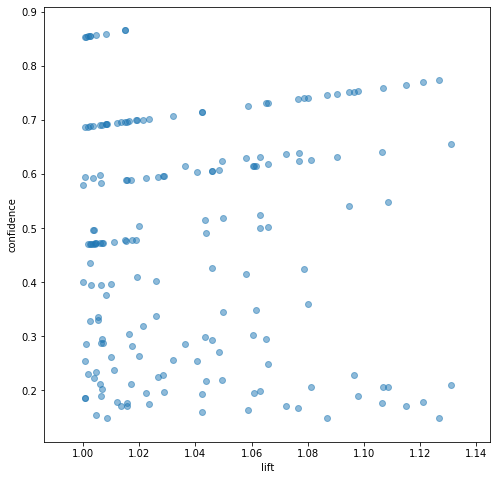

In [70]:
for i in range (len(lift)):
    lift[i] = lift[i]
    confidence[i] = confidence[i]

plt.scatter(lift, confidence, alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

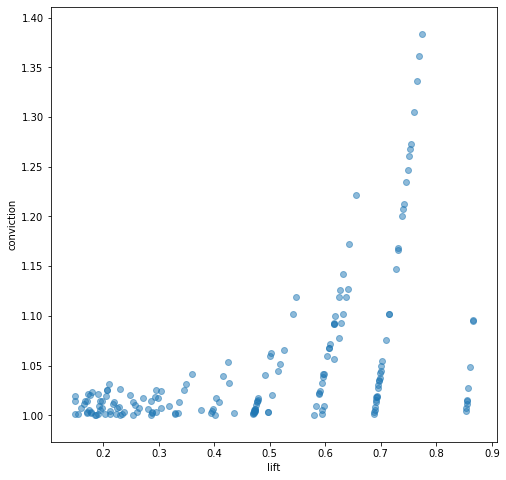

In [71]:
for i in range (len(lift)):
    confidence[i] = confidence[i]
    conviction[i] = conviction[i]

plt.scatter(confidence, conviction, alpha=0.5)
plt.xlabel('lift')
plt.ylabel('conviction') 
plt.show()